<a href="https://colab.research.google.com/github/SimonOlshanCantin/Ok/blob/main/Position_Radiation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install radiation simulator
!pip install git+https://github.com/nasa/radbelt.git  
#install orbit simulator (old commit that works w python 3.7)
!pip install git+https://github.com/pytroll/pyorbital.git@cbe67e2f1136b5fb1fe6935f628845315abb6886  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nasa/radbelt.git to /tmp/pip-req-build-lxc5ixve
  Running command git clone -q https://github.com/nasa/radbelt.git /tmp/pip-req-build-lxc5ixve
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for radbelt: filename=radbelt-0.1.0-cp37-cp37m-linux_x86_64.whl size=209567 sha256=66ef97e2ef8f3269493a751ee0b403a9911ebfed0fa56a449c35c846ff32be65
  Stored in directory: /tmp/pip-ephem-wheel-cache-3qqgco29/wheels/fd/52/6b/77fd56822006682f4144bcca2875fd491ab82f8db490071457
Successfully built radbelt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pytroll/pyorbital.git (to revision cbe67e2f1136b5fb1fe6935f628845315abb6886) to /tmp/pip-req-build-fl0fs9bg
  Running command git clone -q https://github.com/

In [2]:
from radbelt import get_flux
from astropy import units as u
from astropy.coordinates import EarthLocation
from astropy.time import Time
from pyorbital.orbital import Orbital
from datetime import datetime
import numpy as np   
import pandas as pd 
import math as mt
import matplotlib.pyplot as plt
# from google.colab import drive
# import gspread
# drive.mount('/content/drive')

#**Goal**
output: latitude vs longitude map w radiation represented by a color gradient

In [ ]:
#inputs:
altitude = 550
energy = 1 * u.MeV
time = Time('2022-03-01')
jump_size = 1   #this doesn't neccessarily have to be an input but i had a dream about it so here it is. Describes the step size moving along long/lat lines

#define our three empty lists
latitude_list = []
longitude_list = []
flux_list = []

#create an empty dictionary
data = {'Latitudes': latitude_list,'Longitudes': longitude_list, 'Fluxes':flux_list}

for longitude in np.arange(-180,180,jump_size):   #we want to go down each longitude line, taking 0.5 (2atm) degree steps -> we can find radiation at every intersection
  for latitude in np.arange(-90,90,jump_size):
    latitude_list.append(latitude)    #append new latitude to latitude list
    longitude_list.append(longitude)  #append SAME longitude to longitude lists -> keeps all lists the same lenght as radiation list, which is good 
                                      # because when we plot we're going to want a list of (x,y,z) co-ordinates
    coords = EarthLocation(longitude * u.deg, latitude * u.deg, altitude * u.km)
    flux = get_flux(coords, time, energy, 'p', 'max')       #find flux at those coordinates

    flux_list.append(flux.value)       #append flux to the end of flux list -> dataframe should have: latitude, longitude, flux (x,y,z)

    data = {'Latitudes': latitude_list,'Longitudes': longitude_list, 'Fluxes':flux_list} #save list updates into our dictionary    
else:
  datamap = pd.DataFrame(data)  #save dictionary as a dataframe

  #all this is just plotting:    
  plt.scatter(datamap['Longitudes'], datamap['Latitudes'],c = datamap['Fluxes'], cmap="hot_r") #plots! x is longitude, y is latitude, color is flux
  plt.colorbar()
  plt.xlabel('Longitude')          
  plt.ylabel('Latitude')
  plt.title('Flux Map of ' + str(energy) + ' protons at ' + str(altitude) + 'km on ' + str(time))
  plt.show()

KeyboardInterrupt: ignored

#**Goal**
**input:** satalite, time

**Output:** Position, df w energy vs flux

**NB:** this is actually not terribly helpful as it shows 

On 7/9/2022 the satallite has a longitude of -62.45185056606736 degrees, a latitude of 53.464278415699525 degrees and an alitude of 531.2948469858924 km


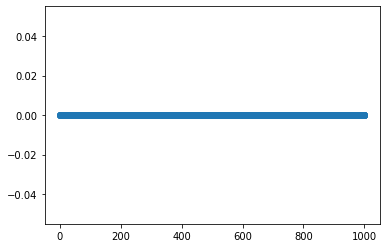

In [ ]:
#Take TLE input file and output energy vs flux for a specific moment in time

#input:
satellite_name = ('VZLUSAT-2')  #TLE found on https://celestrak.org/; to make your own create tle file then enter 'name', 'path/to/file' in to Orbital()
date_entry = (2022,7,9,1,27) #FORMAT: year, month, day, hours, minutes


orbit = Orbital(satellite_name) #Searches TLE file for object in quotes & gets its orbital information

year, month, day, hours, minutes,  = date_entry
date = datetime(year, month, day, hours, minutes) #datetime() makes the date readable  - but it won't take a tuple 
date_radbelt = Time(date) #Time() makes date readable for radbelt

coords = orbit.get_lonlatalt(date)  #retrieves longitude latitude and altitude at specified time, assigns it to below touple
lon, lat, alt = coords  #coords is a tuple. This line creates the variable and names each place in the list so it can be refreed to by a specific variable
coords_radbelt = EarthLocation(lon * u.deg, lat * u.deg, alt * u.km) #makes coordinates useable for radbelt

#This gives american style dates, btw. I'm like 80% sure
print ('On '+ str(month) + '/' + str(day) + '/' + str(year) + ' the satallite has a longitude of ' + str(lon) + ' degrees, a latitude of ' + str(lat) + " degrees and an alitude of " + str(alt) + ' km')

energy_list = []
flux_list = []
fe_dict = {'Flux': flux_list, 'Energy': energy_list}

for energy in np.linspace(0.1,1000,2000):   #get flux vs energy for 2000 intervals btw 0.1 & 1000 Mev
  flux = get_flux(coords_radbelt, date_radbelt, energy * u.MeV, 'p', 'max')
  flux_list.append(flux.value)
  energy_list.append(energy)

else: #plot!
  plt.scatter(energy_list,flux_list)


#**Goal:**
**Inputs:** satallite tle, energy

**Outputs:** flux at a specific energy as a function of time; map of the satallites tragectory as a function of time w color corresponding to flux -> df w time, lat, long, flux

**NB:** date changes as time changes

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in aep8 (vectorized)
  outputs = ufunc(*inputs)


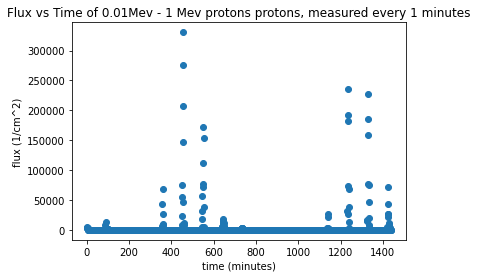

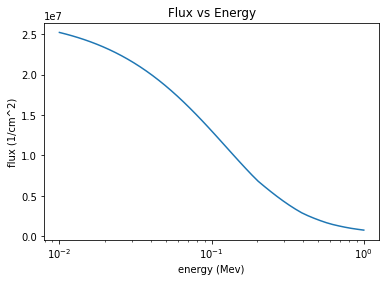

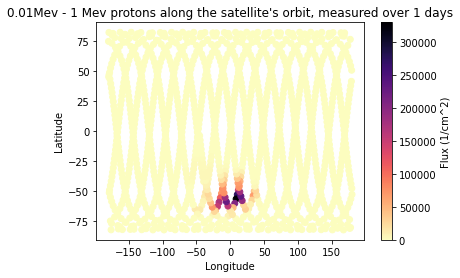

The flux of 0.01 - 1 Mev protons through the sattelite peaks at 330609.28409432585 protons/cm^2
The total flux over a 1 day period is 4279090.9687366355 protons /cm^2 


In [7]:
#inputs:

satellite_name = ('VZLUSAT-2')  #TLE found on https://celestrak.org/; if you have your own then enter 'name', 'path/to/file' in to Orbital()

year = 2022
month = 7
day = 9
hour = 1
minute = 1

#how long you're looking at the object for, in days. (must not be long enough that we transition into a new year)
measurement_period = 1

#how often you're measuring, in minutes.
measure_every = 1

#lowest and highest energy protons measured, in Mev
energy_min = 0.01
energy_max = 1
#How many measurements 
energy_measurements_num = 50



#code:
#creating variables:
orbit = Orbital(satellite_name)

list_index = 0 # right now there are 0 lists in flux_list_list. This variable keeps track of which # list we're on

energy_last = energy_min #start w energy_last set at our first energy

measurement_period_minutes = measurement_period*24*60 #convert measurement period into minutes

energy_min_power = mt.log10(energy_min) #np.logspace starts at base ** start (base to the power of start) and ends with base ** stop
energy_max_power = mt.log10(energy_max)

#create empty lists to fill 
timecount_list = []  
lon_list = []
lat_list = []
energy_list = []
energy_jump_list = []
flux_list_list = [] #this is an empty list to fill with lists that will be filled with data. Each proton energy will get its own list

for energy in np.logspace(energy_min_power, energy_max_power, num = energy_measurements_num, base = 10): #iterate over energy range by specified amount
  #need to reset these for every new energy:
  minute_clock = minute #_clock variables created to change while inputs remain the same
  hour_clock = hour
  day_clock = day
  month_clock = month
  year_clock = year
  
  flux_list_list.append([]) #create new list for each energy threshold, add to our list of lists

  for timecount in np.arange(0,measurement_period_minutes,measure_every): #measure every 1 minutes for the measurement period
    minute_clock = minute_clock + measure_every  #add specified # of minutes to our clock

    if minute_clock >= 60:  #if we get above 60 minutes move our clock up an hour, if we've moved more than 24 hours move it up a day, etc
      minute_clock = minute_clock -60
      hour_clock = hour_clock + 1
      if hour_clock >= 24:
        hour_clock = hour_clock -24
        day_clock = day_clock +1
        if ((month_clock == 1,3,5,7,8,10,12) and (day_clock > 31)): #If only all the months were the same length
          day_clock = day_clock - 31
          month_clock = month_clock +1
        elif ((month_clock == 4,6,9,11) and (day_clock >30)):
          day_clock = day_clock - 30
          month_clock = month_clock + 1
          if month_clock == 13:
            month_clock = month_clock - 12
            year_clock = year_clock + 1
        elif ((month_clock == 2)and (day_clock>28)):
          day_clock = day_clock - 28
          month_clock = month_clock + 1
          if month_clock == 13:
            month_clock = month_clock - 12
            year_clock = year_clock + 1

    time = datetime(year_clock, month_clock, day_clock, hour_clock, minute_clock)  #make our clock readable 
    coords = orbit.get_lonlatalt(time)  #get coords at specified time
    lon, lat, alt = coords  #name each value in coords tuple       
    time_radbelt = Time(time) #make our clock readable for radbelt
    coords_radbelt = EarthLocation(lon * u.deg, lat * u.deg, alt * u.km) #make our coordinates readable for radbelt

    flux = get_flux(coords_radbelt, time_radbelt, energy * u.MeV, 'p', 'max') #get the flux at coords and time
    flux_list_list[list_index].append(flux.value) #append the flux value to the list for our current energy. 

    if energy == energy_min:
      lon_list.append(lon)  #record latitude longitude and time ellapsed values ONLY on the first iteration so that those lists stay the same length as 
      lat_list.append(lat)  #each flux list and as eachother
      timecount_list.append(timecount) #FYI this is time ellapsed not clock time)

  else:
    energy_list.append(energy)  #add our current energy to our list of energies

    energy_jump = energy - energy_last #the jump in enenrgy of protons measured between last loop and this loop
    energy_jump_list.append(energy_jump) #creating a list of all the energy jumps to use later as our dx's in our trapezoidal approximation
    energy_last = energy  # this won't update until after the jump is taken so when we call it above it should always be describing the energy of the 
                          #previous loop
    list_index = list_index + 1 #list_index changes each time we change energy- so we can use it to keep track of where we are & tell our code which list 
                                #to add data into. 
else:
  flux_list_list_ar = np.vstack(flux_list_list) #stack all the lists on top of eachother to make one big array
  energy_jump_ar = np.array(energy_jump_list)

#take the trapezoidal sum approximation of net flux
  flux_ar_size_y, flux_ar_size_x = flux_list_list_ar.shape #find x and y dimensions our array of fluxrs
  flux_trap_area_ar = np.zeros(flux_ar_size_x) #create an empty array w the same lenghth as our flux array (so that we can add rows of values it later)

  for i in np.arange(0,list_index-1): # list_index -1 is actually the last row
    new_row = energy_jump_ar[i]*(flux_list_list_ar[i,:]+flux_list_list_ar[i-1,:])/2 # this is the equation for the area of a trapezoid. We're using i as  
                                                                                #the indes to find the correct dx in our list of stored dx's (energy_jump_ar). 
                                                                                #Because of the way we append values to energy_jump_array and to flux_list_list
                                                                                #A certain i will correspond to a flux vaule and also to the change in energy   
                                                                                #between that flux value and the one taken just before it. Hence i & i-1
    flux_trap_area_ar = np.vstack([flux_trap_area_ar,new_row]) #append the new row to the bottom of flux_trap_area_ae                
  else: 
    flux_all_energies = np.sum(flux_trap_area_ar, axis = 0)  #add up all the fluxes at all the different energies to find the total flux of protoons

    flux_by_energy = np.trapz(flux_list_list_ar, dx = measure_every, axis = 1) #find the cumalitive flux at each energy

    #plotting flux vs time.
    plt.scatter(timecount_list,flux_all_energies)
    plt.xlabel("time (minutes)")
    plt.ylabel("flux (1/cm^2)")
    plt.title('Flux vs Time of '+ str(energy_min)+ 'Mev - ' +str(energy_max)+ ' Mev protons protons, measured every ' + str(measure_every) + ' minutes')
    plt.show()

    #plotting energy vs flux
    plt.plot(energy_list,flux_by_energy)
    plt.xscale('log')
    plt.xlabel("energy (Mev)")
    plt.ylabel("flux (1/cm^2)")
    plt.title("Flux vs Energy")
    plt.show()

    #plotting of flux heatmap
    plt.scatter(lon_list, lat_list, c = flux_all_energies, cmap="magma_r")
    cbar = plt.colorbar()
    cbar.set_label("Flux (1/cm^2)")
    plt.xlabel('Longitude')          
    plt.ylabel('Latitude')
    plt.title(str(energy_min)+ "Mev - " +str(energy_max)+ " Mev protons along the satellite's orbit, measured over " + str(measurement_period) + " days")
    plt.show()

    #find peak of flux values
    flux_peak = np.amax(flux_all_energies)
    print("The flux of " + str(energy_min)+ " - " +str(energy_max)+ " Mev protons through the sattelite peaks at " + str(flux_peak)+ " protons/cm^2")

    #Take trapezoidal approximation of total integral flux
    flux_integral = np.trapz(flux_all_energies, dx = measure_every)
    print("The total flux over a " + str(measurement_period) +  " day period is " + str(flux_integral) + " protons /cm^2 ")

# # #find average of flux values
# #   flux_avg = np.average(flux_array)
# #   print("The average flux per minute is " + str(flux_avg) + " 1Mev protons /cm^2")

# # # #find median of flux values
# # #   flux_med = np.median(flux_array)
# # #   print("At any given time, the flux has a 50% chance of being above " + str(flux_med)+ "and a 50% chance of being below" + str(flux_med))

# #find standard deviation
#   flux_sd = np.std(flux_array)
#   print("The standard deviation is " + str(flux_sd))

# #find percent of time that the satalite experiences flux
#   flux_nozeros = flux_array[flux_array > 0] #create array with no zeroes
#   flux_percent_nozeroes = 100*len(flux_nozeros)/len(flux_array) #use relative length of arrays to find percent
#   #print("The satellite experiences "+str(energy)+" Mev proton flux for " + str(np.around(flux_percent_nozeroes,2))+"% of the " +str(measurement_period)+ " day long measurement period")
#   print("The satellite experiences "+str(energy)+" Mev proton flux for " + str(flux_percent_nozeroes)+"% of the " +str(measurement_period)+ " day long measurement period")

In [ ]:
for x in np.logspace(1,10,num=10):
  print(x)

10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0


In [ ]:
a = np.array([[1,2,3], [4,5,6]])
b = np.sum(a,axis=0)
print(b)

[5 7 9]


In [ ]:
for i in np.arange(0,10):
  if i == 4:
    print("i=4")
  print(i)

0
1
2
3
i=4
4
5
6
7
8
9


In [ ]:
lst=[]
min = 2
min_power= mt.log10(min)
for i in np.logspace(min_power,10):
  print(i)
  for x in np.arange(0,4):
    if i == min:
      lst.append(x)
else: 
  print(lst)

2.0
3.154773317733486
4.976297343141574
7.849545039625538
12.381767623678941
19.530835062779346
30.807678664554942
48.59562131612258
76.65408474339206
120.91313062186737
190.7267591247455
300.8498453322645
474.5565323492368
748.5591430057505
1180.7672055499936
1862.5264372619238
2937.9243539235654
4634.242680638729
7309.992578390379
11530.68476956788
18188.348323114347
28690.057991701848
45255.31471822374
71385.12967934183
112601.95119766612
177616.81558156284
280170.3952887517
441937.04373789846
697105.5968511703
1099605.0682943733
1734502.3647497974
2735980.8899291516
4315699.754688599
6807527.216720268
10738102.611526817
16938139.800964523
26717995.74806121
42144610.044650175
66478345.62757248
104862055.49646503
165408007.3614682
260912384.0817123
411559713.7836074
649188801.8492785
1024021755.1227388
1615278254.919911
2547918369.668225
4019052444.1961656
6339599706.76079
10000000000.0
[0, 1, 2, 3]


In [ ]:

ar = np.array([[2,4,6,7],[2,2,2,2]])
y,x = ar.shape
arr = np.zeros(x)
ar_2 = 2*ar
arr = np.vstack([arr,ar_2])
print(arr)

[[ 0.  0.  0.  0.]
 [ 4.  8. 12. 14.]
 [ 4.  4.  4.  4.]]


In [ ]:
test = np.array ([3502.49926758,2821.27954102,2279.2722168,1846.56494141,1505.70568848])
trap_int = np.trapz(test, dx = 2)
print(trap_int)

18902.43835452


In [ ]:
lst = [1,2,3,4]
ar = np.array([2,4,6,8])
np.delete(ar,[0])

array([4, 6, 8])

In [ ]:
list_list = []
x = 0
for i in np.arange(x,10,0.5):
  list_list.append([])
  list_list[x].append(1)
  list_list[x].append(2)
  x = x + 1
  print(i)


  # list_list_array = np.array(list_list)
  # print(list_list_array)
  # list_total = np.sum(list_list_array,0)
  # print(list_total)
# count = 0
# z = 0
# for z in np.arange (z,x-1):
#   list_real = list_real + list_list[count]
#   count = count+1
# else:
#   print (list_real)

0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Goal:**
**Inputs:** filepath to google sheet containing all satalite data

**Outputs:** 3d scatterplot

                   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0                         NaN         NaN         NaN         NaN   
1    SHIJIAN-6 05A (SJ-6 05A)       470.0       97.00         NaN   
2               STARLINK-3317       540.0       53.00         NaN   
3               FGRST (GLAST)       550.0       26.00         NaN   
4                       SWIFT       590.0       20.00         NaN   
..                        ...         ...         ...         ...   
127                  RISAT-2B       573.0       37.00         NaN   
128               STARLINK-71       437.0       53.00         NaN   
129              FORMOSAT 7-3       537.0       24.00         NaN   
130              FORMOSAT 7-1       538.0       24.00         NaN   
131                 ARMADILLO       314.0       28.52         NaN   

       Unnamed: 4  Unnamed: 5    Unnamed: 6   Unnamed: 7  Unnamed: 8  \
0             NaN         NaN           NaN          NaN         NaN   
1    5.223347e+05  368.8804

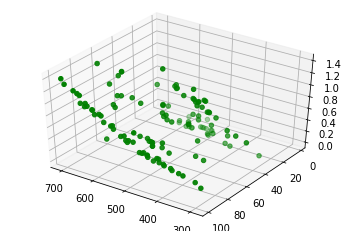

In [ ]:
from mpl_toolkits import mplot3d

#import csv w all teh data
data_df = pd.read_csv('/content/drive/MyDrive/Satellite_data_mod_3.csv')
print(data_df)
#plot
#plt.scatter(data_df['Unnamed: 1'],data_df['Unnamed: 2'])
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(data_df['Unnamed: 1'],data_df['Unnamed: 2'], data_df['Unnamed: 4'], color = "green")
ax.view_init(40,125)
plt.show()

In [ ]:
#this does the same thing but uses plotly and is prettier
import plotly.express as px
fig = px.scatter_3d(data_df, x="Unnamed: 1", y="Unnamed: 2", z="Unnamed: 6", color="Unnamed: 6",
                    labels={
                     "Unnamed: 1": "avg altitude (km)",
                     "Unnamed: 2": "Inclination (degrees)",
                     "Unnamed: 6": "Peak flux"
                    },
                 title= "graph of inclination and altitude vs neet flux", opacity=0.7)
fig.update_traces(marker={'size': 5})
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
ar = np.array([1,6,4,2,0,2,3,4,3,2,0,7])
onpeak = False

for i in ar: #examine every value in our array of fluxes
    if i > 0 and onpeak == False:
      array = np.split(ar,[i])
    elif i >0:                     
      onpeak = True
    else:
      onpeak = False
else:
  print(array)

[array([1, 6, 4, 2, 0, 2, 3]), array([4, 3, 2, 0, 7])]


#**Satellites**
SHIJIAN-6 05A (SJ-6 05A): One of a pair of Chinese 'technology satellites' (?) probing radiation environment **In polar LEO (~470 km)**

STARLINK-3317: daddy elon gets what daddy elon wants. **53.2177 inclination, ~540 km**

->all starlink sattelites are at ~53 incl

FGRST (GLAST):Fermi Gamma-ray Space Telescope, making gamma observations from a leo **25.5835 inclination, 550km**

ONEWEB-0389: Internet satallite in **polar (87.9553) orbit at ~1200km**

ZY-1 02E: Chinese Earth observation satellite **polar (98.5733) at ~730 km**

YAOGAN-35 A: Chinese military satalite **35 degree inclination, unknown altitude** (probably around 400 km)